## IMPLEMENTATION OF ANN IN KERAS

Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

Q2. Load the Wine Quality dataset and explore its dimensions.

Dataset link:

Q3. Check for null values, identify categorical variables, and encode them.

Q4. Separate the features and target variables from the dataset.

Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

Q6. Scale the dataset using an appropriate scaling technique.

Q7. Design and implement at least two hidden layers and an output layer for the binary categorical
variables.

Q8. Create a Sequential model in Keras and add the previously designed layers to it.
Q9. Print the summary of the model architecture.

Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

Q11. Compile the model with the specified loss function, optimizer, and metrics.

Q12. Fit the model to the training data using appropriate batch size and number of epochs.

Q13. Obtain the model's parameters (weights and biases).

Q14. Store the model's training history as a Pandas DataFrame.

Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

Q16. Evaluate the model's performance using the test dataset and report relevant metrics.


## SOLUTION

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [26]:
##importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.preprocessing import StandardScaler
import os

In [27]:
#print version of  tensorflow
print(f"tensorflow_version {tf.__version__}")
print(f"tensorflow_version {keras.__version__}")

tensorflow_version 2.13.0
tensorflow_version 2.13.1


In [29]:
df=pd.read_csv('wine.csv')
df.shape

(1599, 12)

In [23]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [30]:
##checking for null values
df.isna().sum().sum()

0

In [31]:
#filter categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category'])
categorical_var_names = list(categorical_vars.columns)
print(categorical_var_names)
print(df[categorical_var_names].value_counts())

['quality']
quality
good       855
bad        744
dtype: int64


In [32]:
from sklearn.preprocessing import LabelEncoder

#label encode the categorical variable
label_enc = LabelEncoder()
df[categorical_var_names[0]] = label_enc.fit_transform(df[categorical_var_names[0]])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [44]:
##splitting features and target variables from dataset
X=df.iloc[:,:-1]
y=df['quality']


In [51]:
from sklearn.model_selection import train_test_split

#split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Training set size:", x_train.shape[0])
print("Validation set size:", x_val.shape[0])
print("Test set size:", x_test.shape[0])

Training set size: 1023
Validation set size: 256
Test set size: 320


In [52]:
##performing scaling 
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [54]:
input_shape = (x_train_scaled.shape[1],)

model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=input_shape))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [56]:
##summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [59]:
model.fit(x_train_scaled, y_train, batch_size=32, epochs=30, validation_data=(x_val_scaled, y_val))

Epoch 1/30
32/32 [==============================] - 1s 9ms/step - loss: 0.6959 - accuracy: 0.5200 - val_loss: 0.6881 - val_accuracy: 0.5742
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.5718 - val_loss: 0.6760 - val_accuracy: 0.6133
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.6266 - val_loss: 0.6648 - val_accuracy: 0.6328
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.6579 - val_loss: 0.6540 - val_accuracy: 0.6641
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.6395 - accuracy: 0.6891 - val_loss: 0.6433 - val_accuracy: 0.6797
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.6274 - accuracy: 0.6979 - val_loss: 0.6326 - val_accuracy: 0.6914
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.7067 - val_loss: 0.6223 - val_accuracy: 0.6953
Epoch 8/30
32/32 [==

In [60]:
##Get the model parameters.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
history = pd.DataFrame(model.history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,0.695931,0.520039,0.688131,0.574219
1,0.679984,0.571847,0.675981,0.613281
2,0.665525,0.626588,0.664761,0.632812
3,0.652167,0.657869,0.654039,0.664062
4,0.639478,0.689150,0.643253,0.679688
5,0.627383,0.697947,0.632590,0.691406
6,0.615530,0.706745,0.622293,0.695312
7,0.604104,0.714565,0.612757,0.699219
8,0.593453,0.720430,0.603590,0.703125
9,0.583419,0.726295,0.595393,0.714844


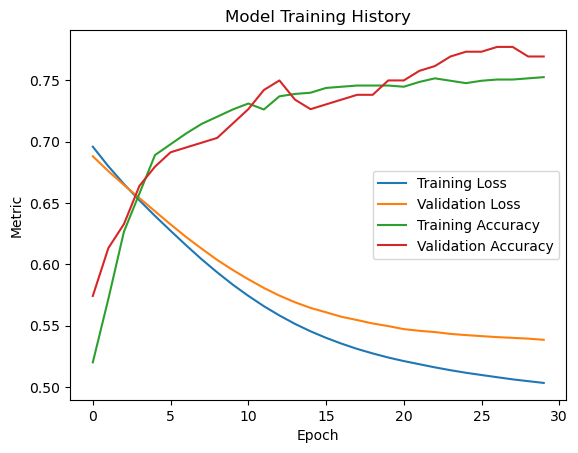

In [62]:

##Plot the model's training history.

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Model Training History')
plt.legend()
plt.show()

In [63]:
##Evaluate the model's performance using the test data.

loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

10/10 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.7188
Test Loss: 0.5215422511100769
Test Accuracy: 0.71875
